<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*12 de Octubre de 2024*

**Nombre Estudiante(s)**: `Giuseppe Lavarello - Víctor Saldivia - Ingrid Solís - Cristian Tobar`  

In [6]:
#pip install ucimlrepo

In [60]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
import missingno as msng

sns.set_theme()
pd.set_option('display.max_columns', None)

In [8]:

  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [35]:
df0=pd.concat([y,X], axis=1)

In [37]:
# Mostrar las primeras 10 filas de los datos

df0.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,True,True,True,40,True,False,False,False,False,True,False,True,False,5,18,15,True,False,9,4,3
1,0,False,False,False,25,True,False,False,True,False,False,False,False,True,3,0,0,False,False,7,6,1
2,0,True,True,True,28,False,False,False,False,True,False,False,True,True,5,30,30,True,False,9,4,8
3,0,True,False,True,27,False,False,False,True,True,True,False,True,False,2,0,0,False,False,11,3,6
4,0,True,True,True,24,False,False,False,True,True,True,False,True,False,2,3,0,False,False,11,5,4
5,0,True,True,True,25,True,False,False,True,True,True,False,True,False,2,0,2,False,True,10,6,8
6,0,True,False,True,30,True,False,False,False,False,False,False,True,False,3,0,14,False,False,9,6,7
7,0,True,True,True,25,True,False,False,True,False,True,False,True,False,3,0,0,True,False,11,4,4
8,1,True,True,True,30,True,False,True,False,True,True,False,True,False,5,30,30,True,False,9,5,1
9,0,False,False,True,24,False,False,False,False,False,True,False,True,False,2,0,0,False,True,8,4,3


In [38]:
# Recopilación de información básica sobre el conjunto de datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  bool 
 2   HighChol              253680 non-null  bool 
 3   CholCheck             253680 non-null  bool 
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  bool 
 6   Stroke                253680 non-null  bool 
 7   HeartDiseaseorAttack  253680 non-null  bool 
 8   PhysActivity          253680 non-null  bool 
 9   Fruits                253680 non-null  bool 
 10  Veggies               253680 non-null  bool 
 11  HvyAlcoholConsump     253680 non-null  bool 
 12  AnyHealthcare         253680 non-null  bool 
 13  NoDocbcCost           253680 non-null  bool 
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [39]:
# Notar que estan todas las Features consideradas como Int. Se cambia a Bool donde corresponda

binary_features = {
    "Diabetes_binary": bool,
    "HighBP": bool,
    "HighChol": bool,
    "CholCheck": bool,
    "Smoker": bool,
    "Stroke": bool,
    "HeartDiseaseorAttack": bool,
    "PhysActivity": bool,
    "Fruits": bool,
    "Veggies": bool,
    "HvyAlcoholConsump": bool,
    "AnyHealthcare": bool,
    "NoDocbcCost": bool,
    "DiffWalk": bool,
    "Sex": bool,
}
df0 = df0.astype(binary_features)

In [40]:
# Recopilación de estadísticas descriptivas sobre los datos
df0.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [41]:
# Mostrar el tamaño del DataFrame
df0.shape

(253680, 22)

<Axes: >

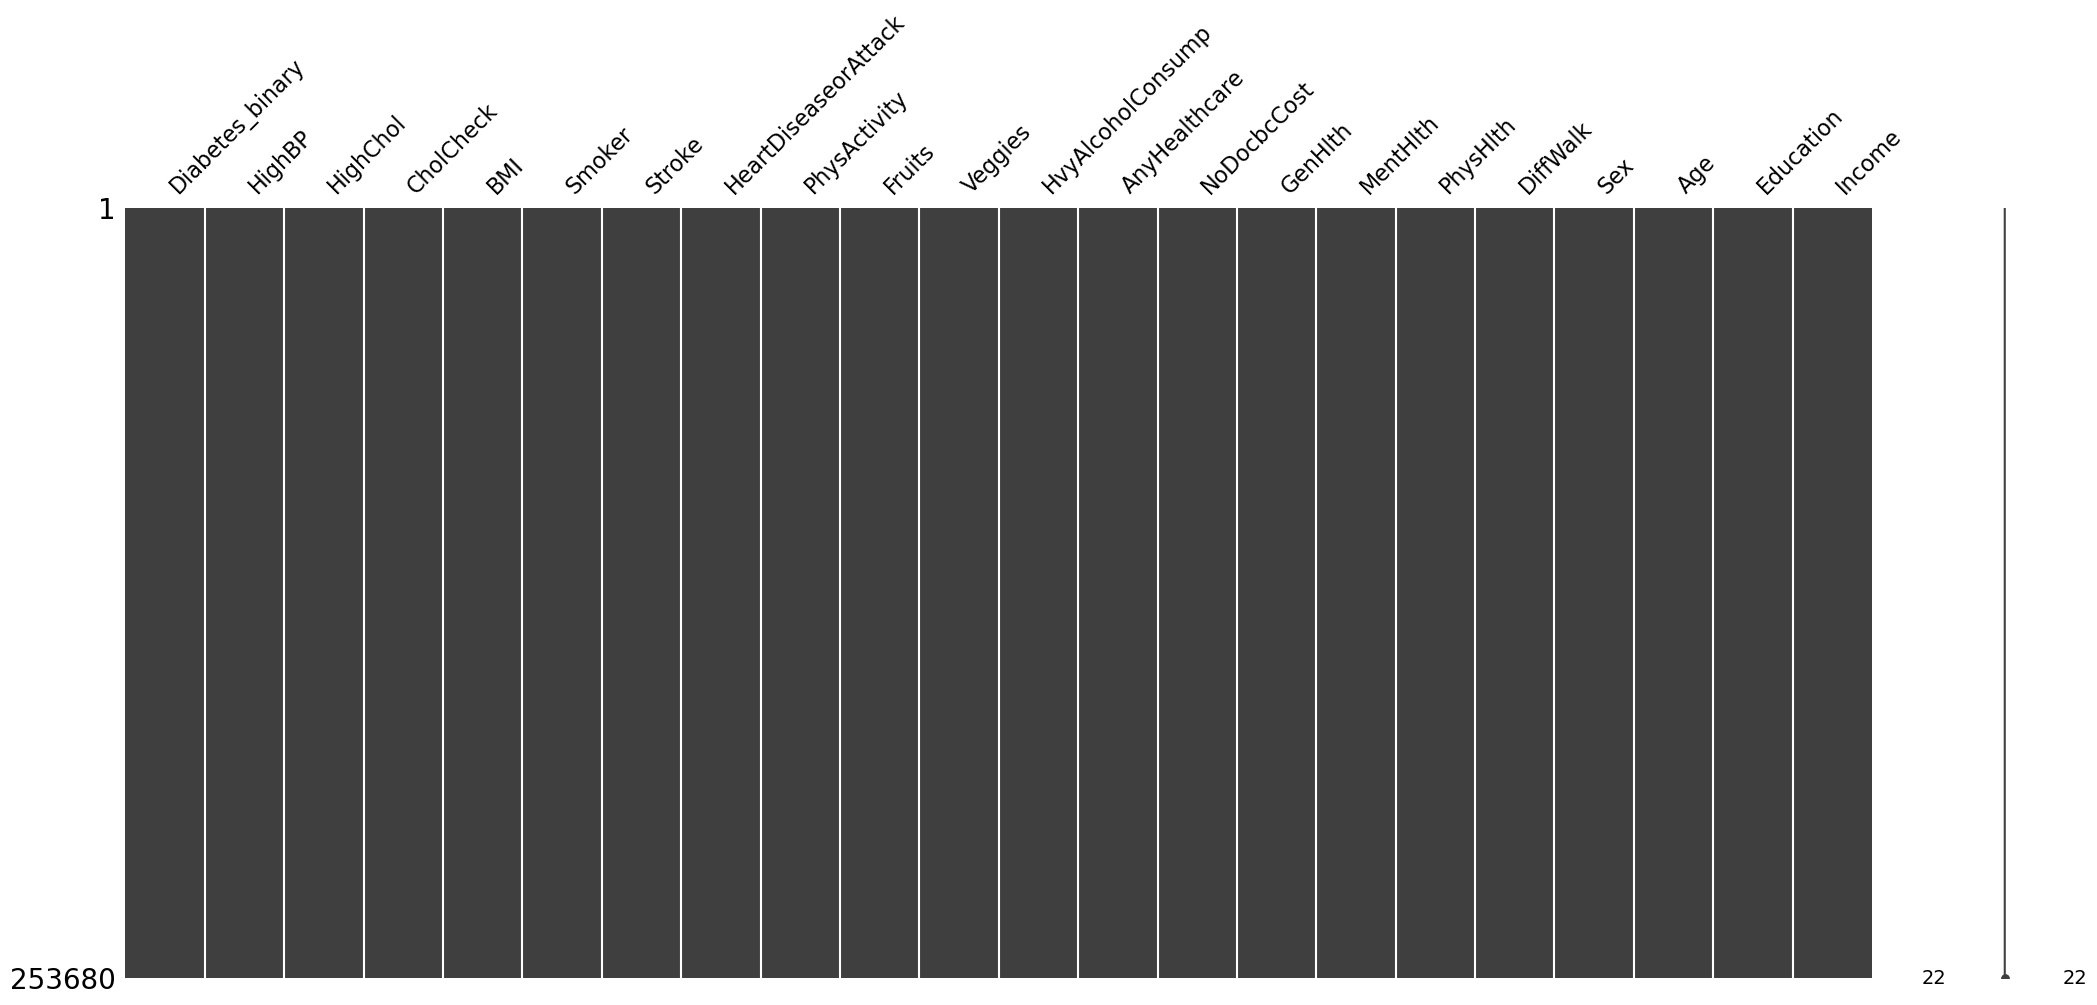

In [43]:
# Chequeo visual de Nans
msng.matrix(df0)

In [44]:
# Chequeo por dupes
duplicados = df0.duplicated().sum()

# Porcentage de dupes
porcentage = df0.duplicated().sum() / X.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentage.round(2)}% del total de los datos.')


24206 filas contienen duplicados, lo que representa el 9.54% del total de los datos.


In [47]:
# Eliminar duplicados y guardar el dataframe resultante en una nueva variable
df1 = df0.drop_duplicates(keep='first')

df1.shape

(229474, 22)

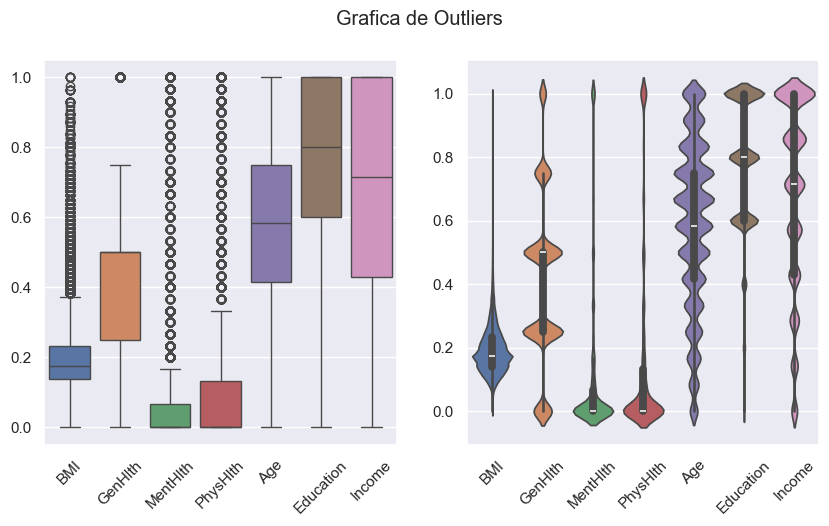

In [80]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df1.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
sns.boxplot(data= df_normalized, ax=axs[0])
sns.violinplot(data= df_normalized, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica de Outliers')
plt.show()


In [75]:
# Bucle para recorrer cada columna numérica y detectar y contar valores atípicos
out_cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
upperlim = {}
for column in out_cols:
    print(f"Procesando columna: {column}")
    
    # Calcular el valor del percentil 25
    percentil25 = df1[column].quantile(0.25)
    
    # Calcular el valor del percentil 75
    percentil75 = df1[column].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    iqr = percentil75 - percentil25
    
    # Definir los límites superior e inferior para los valores no atípicos
    límite_superior = percentil75 + 1.5 * iqr
    límite_inferior = percentil25 - 1.5 * iqr
    upperlim[column] = límite_superior
    
    print(f"Límite inferior para {column}:", límite_inferior)
    print(f"Límite superior para {column}:", límite_superior)
    
    # Identificar los valores atípicos en la columna actual
    valores_atípicos = df1[(df1[column] > límite_superior) | (df1[column] < límite_inferior)]
    
    # Contar el número de filas con valores atípicos
    print(f"Número de filas que contienen valores atípicos en {column}: {len(valores_atípicos)}\n")


Procesando columna: BMI
Límite inferior para BMI: 12.0
Límite superior para BMI: 44.0
Número de filas que contienen valores atípicos en BMI: 5638

Procesando columna: GenHlth
Límite inferior para GenHlth: 0.5
Límite superior para GenHlth: 4.5
Número de filas que contienen valores atípicos en GenHlth: 12078

Procesando columna: MentHlth
Límite inferior para MentHlth: -3.0
Límite superior para MentHlth: 5.0
Número de filas que contienen valores atípicos en MentHlth: 36162

Procesando columna: PhysHlth
Límite inferior para PhysHlth: -6.0
Límite superior para PhysHlth: 10.0
Número de filas que contienen valores atípicos en PhysHlth: 34346



**Desición** Basandonos en las figuras y las cantidades se descartara los outliers en BMI, MenHlth y PhysHlth, manteniendo los valores de GenHlth, pues se comportan de manera Normal

In [78]:
# usar una máscara booleana para eliminar valores atípicos
mask = True
for column, upper_limit in upperlim.items():
    if column == 'GenHelth': continue
    mask &= (df1[column] <= upper_limit)
df2 = df1[mask].copy()


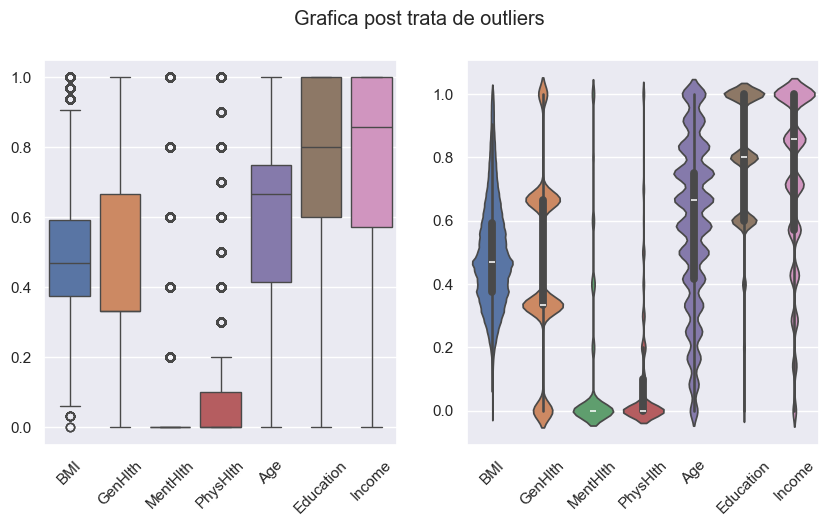

In [81]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df2.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized2 = pd.DataFrame(normalized_data2, columns=num_columns.columns)
sns.boxplot(data= df_normalized2, ax=axs[0])
sns.violinplot(data= df_normalized2, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica post trata de outliers')
plt.show()